In [3]:
import pandas as pd
df = pd.read_csv('./data/TSLA.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/TSLA.csv'

In [7]:
import os
print(os.getcwd())

c:\Users\avinash\Downloads\my projects\machine learning projects\STOCK PREDICTION MODEL


In [ ]:
path  = r"c:\Users\avinash\Downloads\my projects\machine learning projects\STOCK PREDICTION MODEL"
os.path.exists(path)

True

In [2]:
import pandas as pd
df = pd.read_csv(r"c:\Users\avinash\Downloads\my projects\machine learning projects\data\RELIANCE.NS.csv")

In [3]:
df.head

<bound method NDFrame.head of             Date         Open         High          Low        Close  \
0     2013-01-01   418.037415   419.325226   415.610443   416.402924   
1     2013-01-02   418.037415   423.981079   417.319244   419.993866   
2     2013-01-03   420.315826   426.952911   418.334595   426.333771   
3     2013-01-04   426.903381   428.240692   422.767578   426.878632   
4     2013-01-07   428.785553   431.410645   421.900787   424.278259   
...          ...          ...          ...          ...          ...   
2465  2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049   
2466  2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951   
2467  2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951   
2468  2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049   
2469  2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951   

        Adj Close     Volume  
0      387.885162  3152667.0  
1      391.230164  6203434.0  
2      397.1

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2.468000e+03
mean,1142.582396,1155.578648,1129.056036,1141.756366,1125.130164,8.580616e+06
std,757.531445,765.963177,748.583339,756.968905,762.305175,6.208571e+06
min,379.898926,385.322540,378.363495,380.171356,354.134949,0.000000e+00
25%,481.566482,486.822914,477.721680,481.851288,461.581360,5.111980e+06
50%,911.361206,918.245941,901.108368,908.637024,889.188721,6.837222e+06
75%,1839.000000,1872.899994,1807.837524,1843.550018,1832.122437,9.686568e+06
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2470 non-null   object 
 1   Open       2468 non-null   float64
 2   High       2468 non-null   float64
 3   Low        2468 non-null   float64
 4   Close      2468 non-null   float64
 5   Adj Close  2468 non-null   float64
 6   Volume     2468 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.2+ KB


In [6]:
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [7]:
df['Open'] = df['Open'].fillna(df['Open'].mean())
df['High'] = df['High'].fillna(df['High'].mean())
df['Low'] = df['Low'].fillna(df['Low'].mean())
df['Close'] = df['Close'].fillna(df['Close'].mean())
df['Adj Close'] = df['Adj Close'].fillna(df['Adj Close'].mean())
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
x = df[['High', 'Low', 'Open', 'Volume']]
y = df['Close']
x.shape

(2470, 4)

In [10]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
x_train.shape

(1976, 4)

In [12]:
x_test.shape

(494, 4)

In [13]:
model = LinearRegression().fit(x_train, y_train)

In [14]:
model

LinearRegression()

In [15]:
print(model.coef_)

[ 8.70988557e-01  7.49720554e-01 -6.22285349e-01 -1.08736943e-07]


In [16]:
print(model.intercept_)

0.6964769271260138


In [21]:
predicted = model.predict(x_test)
print(predicted)

[ 678.71316791 2609.58807184 1543.06307601 1326.48206322  538.45289368
  519.76016396  472.31715425 1542.7005462   438.79007097 2004.66465465
 2194.61356231 1529.09699688  927.3836832  1930.53729235 2541.31551434
 2621.7937897   519.14373451 1350.79857975 2786.55974856  647.85418732
 1053.81570387  474.43019591  400.70984864 2102.65782228  907.5082773
  417.64379499  874.03348198 2608.59394407  993.47420204  485.34166198
 1260.18139982  924.83418921  901.52845574  448.91308934 2599.99990322
  467.99867035  475.42058606 1736.57995355 1215.3063904  1323.32589886
  657.3797408  2792.79447842 1071.10086677 2611.56911058  460.42400491
  740.15793589 2616.96526682 1745.1806299  1355.31423538 2369.05340361
 2511.59664675 1243.25376095  432.3545065   404.05483458  704.1342767
 1358.69901684  922.35888843  487.19063615 2282.71270693  444.19351397
  672.42353297  425.73271658 1117.18876616  481.25546343 2285.03094919
  411.09622363  939.38868782  443.63539703  588.63268309 1103.65142694
  440.94

In [22]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predicted.flatten()})

In [23]:
df1

,Actual,Predicted
0,677.973511,678.713168
1,2598.600098,2609.588072
2,1547.283325,1543.063076
3,1327.566040,1326.482063
4,533.691162,538.452894
...,...,...
489,433.812897,436.341093
490,2230.449951,2234.173510
491,630.671875,629.062106
492,1955.000000,1938.717801


<Axes: >

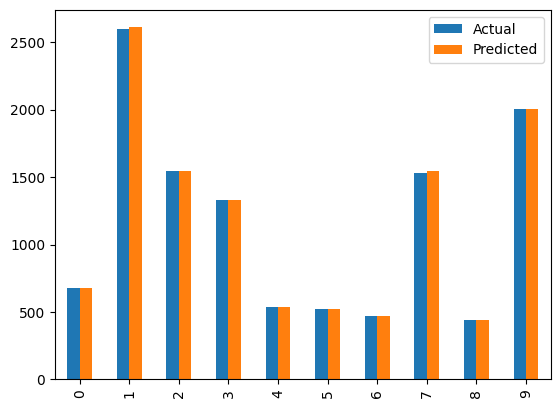

In [24]:
graph = df1.head(10)
graph.plot(kind='bar')

In [25]:

model.score(x_train, y_train)

0.9999030214092453

In [26]:
model.score(x_test, y_test)

0.9998867000963296

In [24]:
import numpy as np
a = int(input("enter 1st data"))
b = int(input("enter 2st data"))
c = int(input("enter 3rd data"))
d = int(input("enter 4th data"))
new_data = np.array([[a, b, c, d]])
predicted_value = model.predict(new_data)
print("the predictd stock price:", predicted_value)

the predictd stock price: [437.06305966]


c:\Users\avinash\Downloads\my projects\machine learning projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
import joblib
joblib.dump(model, 'model.pkl')
print('model saved as mode.pkl')

model saved as mode.pkl


In [37]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64